<a href="https://www.kaggle.com/code/teetlhmus/pjk-10klass-koolid-maakonnad?scriptVersionId=128393341" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [116]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

1. Andmete import

In [117]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/schoolstat/Statistics - EST - schools and students by counties 1993 - 2021.csv


In [118]:
# Lähteandmete faili asukoht
source_data_path = '/kaggle/input/schoolstat/Statistics - EST - schools and students by counties 1993 - 2021.csv'

# Loeme andmed failist 2-dimensionaalsesse (read ja veerud) andmemassiivi (ingl. "DataFrame")
# Kui veergude eraldajaks on koma, pole eraldajat vaja märkida
my_data = pd.read_csv(source_data_path, sep = ';')

2. Andmetega tuvumine

In [119]:
# mitu rida, mitu veergu
my_data.shape

(435, 4)

In [120]:
# millised veerud on andmetes
my_data.columns

Index(['Year', 'County', 'No of schools', 'No of students'], dtype='object')

In [121]:
# lähteandmete statistika
my_data.describe()
# kvartiil (ingl percentile); n% = x  <- see näitab et n% andmetest jääb alla x väärtuse

,Year,No of schools,No of students
count,435.000000,435.000000,435.000000
mean,2007.000000,40.197701,11521.781609
std,8.376234,32.391933,16136.801401
min,1993.000000,6.000000,815.000000
25%,2000.000000,22.000000,3573.000000
50%,2007.000000,31.000000,5880.000000
75%,2014.000000,44.500000,11171.500000
max,2021.000000,160.000000,78068.000000


In [122]:
# statistika lähteandmete kohta - ainult kategooria-veerud, meie andmete korral "County" veerg
my_data.describe(include = 'object')
# count: ridu
# unique: mitu erinevat väärtust
# top: esimene väärtus, tähestikulises järjestuses
# freq: suurim esinemissagedus, meie andmetes on iga maakonna kohta võrdselt 29 rida

,County
count,435
unique,15
top,Harju maakond
freq,29


In [123]:
# Iga maakonna kohta on sama kogus andmeid (1993 .. 2021)
my_data.County.value_counts()

Harju maakond         29
Hiiu maakond          29
Ida-Viru maakond      29
Jõgeva maakond        29
Järva maakond         29
Lääne maakond         29
Lääne-Viru maakond    29
Põlva maakond         29
Pärnu maakond         29
Rapla maakond         29
Saare maakond         29
Tartu maakond         29
Valga maakond         29
Viljandi maakond      29
Võru maakond          29
Name: County, dtype: int64

In [124]:
# näita esimesed või viimased n rida / esimesed ja viimased 5 rida
print(my_data.head(5))
print(my_data.tail(5))
my_data

   Year            County  No of schools  No of students
0  1993     Harju maakond            154           75774
1  1993      Hiiu maakond             14            1794
2  1993  Ida-Viru maakond             59           27811
3  1993    Jõgeva maakond             34            6290
4  1993     Järva maakond             35            6560
     Year            County  No of schools  No of students
430  2021     Saare maakond             21            3480
431  2021     Tartu maakond             59           21260
432  2021     Valga maakond             18            2878
433  2021  Viljandi maakond             28            5108
434  2021      Võru maakond             23            3578


,Year,County,No of schools,No of students
0,1993,Harju maakond,154,75774
1,1993,Hiiu maakond,14,1794
2,1993,Ida-Viru maakond,59,27811
3,1993,Jõgeva maakond,34,6290
4,1993,Järva maakond,35,6560
...,...,...,...,...
430,2021,Saare maakond,21,3480
431,2021,Tartu maakond,59,21260
432,2021,Valga maakond,18,2878
433,2021,Viljandi maakond,28,5108


In [125]:
# mitu erinevat väärtust leidub igas veerus
my_data.nunique()

Year               29
County             15
No of schools      75
No of students    420
dtype: int64

In [126]:
print(my_data.count())
print('----------')
print('Maakonnaga ridu kokku: ',my_data['County'].count())
print('Unikaalseid maakonna väärtusi kokku:', my_data['County'].nunique())
print('Unikaalseid aastaarve kokku:', my_data['Year'].nunique())

Year              435
County            435
No of schools     435
No of students    435
dtype: int64
----------
Maakonnaga ridu kokku:  435
Unikaalseid maakonna väärtusi kokku: 15
Unikaalseid aastaarve kokku: 29


In [127]:
# soovitus: kasuta print-käsku, muidu kuvatakse väljundaknas vaid viimase käsu tulemust
# võrdle tulemust eelmise plokiga
my_data.count()
my_data['County'].count()
my_data['County'].nunique()
my_data['Year'].nunique()

29

3. Andmete puhastamine: puuduvad väärtused, duplikaadid, oluliselt erinevad väärtused

In [128]:
# kontrollime kas esineb puuduvaid väärtusi (NULL)
my_data.isnull().sum()

Year              0
County            0
No of schools     0
No of students    0
dtype: int64

In [129]:
my_data.isnull()

,Year,County,No of schools,No of students
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
430,False,False,False,False
431,False,False,False,False
432,False,False,False,False
433,False,False,False,False


In [130]:
# alati tasub kontrollida, kas leidub duplikaatkirjeid
print(my_data[my_data.duplicated(['Year','County'],keep=False)]) # näitab kõik duplikaadid

Empty DataFrame
Columns: [Year, County, No of schools, No of students]
Index: []


In [131]:
# tekitame testimise eesmärgil duplikaatrea (hiljem eemaldame)
# defineerime uue rea väärtused:
new_row = pd.DataFrame({'Year': [1994], 'County': ['Saare maakond'], 'No of schools': [37], 'No of students': [6135]})
# lisame uue rea olemasolevale datafreimile
my_data = pd.concat([my_data,new_row],ignore_index = True) # ignore_index: uuele reale genereeritakse indeksi väärtus
# kuvame andmed, lisatud rida asub kõige lõpus
my_data

,Year,County,No of schools,No of students
0,1993,Harju maakond,154,75774
1,1993,Hiiu maakond,14,1794
2,1993,Ida-Viru maakond,59,27811
3,1993,Jõgeva maakond,34,6290
4,1993,Järva maakond,35,6560
...,...,...,...,...
431,2021,Tartu maakond,59,21260
432,2021,Valga maakond,18,2878
433,2021,Viljandi maakond,28,5108
434,2021,Võru maakond,23,3578


In [132]:
# näitame millised read on duplikaadid
print(my_data[my_data.duplicated(['Year','County'],keep=False)]) # näitab kõik duplikaadid
print(my_data[my_data.duplicated(['Year','County'],keep='first')]) # esimest korduvrida ei loeta duplikaadiks
print(my_data[my_data.duplicated(['Year','County'],keep='last')]) # viimast korduvrida ei loeta duplikaadiks

     Year         County  No of schools  No of students
25   1994  Saare maakond             37            6135
435  1994  Saare maakond             37            6135
     Year         County  No of schools  No of students
435  1994  Saare maakond             37            6135
    Year         County  No of schools  No of students
25  1994  Saare maakond             37            6135


In [133]:
# duplikaatridade eemaldamine
my_data = my_data.drop_duplicates(['Year','County'],keep='first')

In [134]:
# uus kontroll, tulemuseks tühi DataFrame
print(my_data[my_data.duplicated(['Year','County'],keep=False)]) # näitab kõik duplikaadid
# endine seis on andmetes taastatud:
print(my_data.count())
print('----------')
print('Maakonnaga ridu kokku: ',my_data['County'].count())
print('Unikaalseid maakonna väärtusi kokku:', my_data['County'].nunique())
print('Unikaalseid aastaarve kokku:', my_data['Year'].nunique())

Empty DataFrame
Columns: [Year, County, No of schools, No of students]
Index: []
Year              435
County            435
No of schools     435
No of students    435
dtype: int64
----------
Maakonnaga ridu kokku:  435
Unikaalseid maakonna väärtusi kokku: 15
Unikaalseid aastaarve kokku: 29


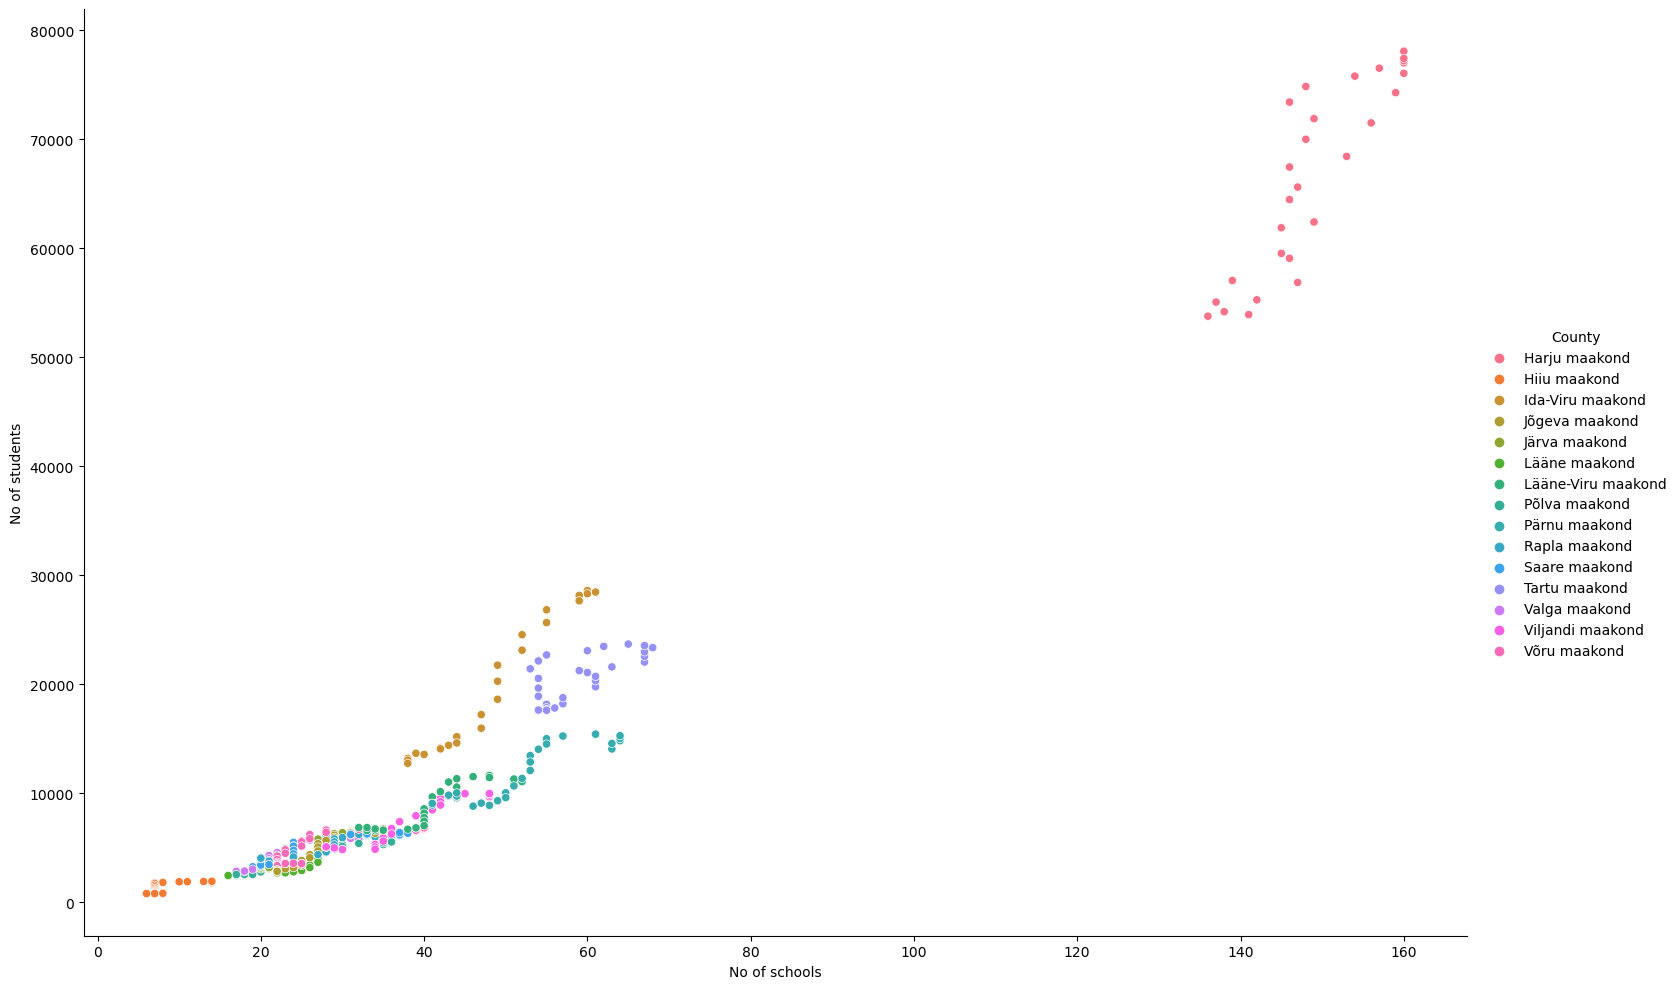

In [135]:
# kontrolime visuaalselt, kas andmete hulgas leidub oluliselt erinevaid väärtuseid
import seaborn as sns
sns.relplot(x = 'No of schools', y = 'No of students', hue = 'County', data = my_data, height = 10, aspect = 1.5)

4. Mõned kasulikud käsud analüüsiks

In [136]:
# Veeru summa - tõsi, meie andmete korral ei anna mingit olulist informatsiooni
print(my_data['No of students'].sum())
print(my_data['No of schools'].sum())

5011975
17486


In [137]:
# Andmed filtreerituna maakondade loetelu järgi
print(my_data.query("County in ('Harju maakond','Saare maakond')"))

     Year         County  No of schools  No of students
0    1993  Harju maakond            154           75774
10   1993  Saare maakond             36            6009
15   1994  Harju maakond            157           76502
25   1994  Saare maakond             37            6135
30   1995  Harju maakond            160           76991
40   1995  Saare maakond             37            6211
45   1996  Harju maakond            160           77189
55   1996  Saare maakond             38            6346
60   1997  Harju maakond            160           78068
70   1997  Saare maakond             37            6407
75   1998  Harju maakond            160           78056
85   1998  Saare maakond             36            6410
90   1999  Harju maakond            160           77398
100  1999  Saare maakond             33            6355
105  2000  Harju maakond            160           76034
115  2000  Saare maakond             33            6286
120  2001  Harju maakond            159         

In [138]:
########################################################
# 14.03.2023 ehk teisipäevase tunni materjal algab siit
########################################################

In [139]:
# Andmed ühe aasta kohta
my_data.query("Year == 1993")

,Year,County,No of schools,No of students
0,1993,Harju maakond,154,75774
1,1993,Hiiu maakond,14,1794
2,1993,Ida-Viru maakond,59,27811
3,1993,Jõgeva maakond,34,6290
4,1993,Järva maakond,35,6560
5,1993,Lääne maakond,27,5028
6,1993,Lääne-Viru maakond,51,10982
7,1993,Põlva maakond,35,5311
8,1993,Pärnu maakond,63,14079
9,1993,Rapla maakond,34,6002


In [140]:
# Õpilaste koguarv aastal 1993 
my_data.query("Year == 1993")['No of students'].sum()

209016

In [141]:
# Õpilaste arv igal aastal
my_data.groupby('Year')['No of students'].sum()

Year
1993    209016
1994    212375
1995    214562
1996    215661
1997    217501
1998    217577
1999    215841
2000    212184
2001    207612
2002    200478
2003    192570
2004    183951
2005    173822
2006    164024
2007    155071
2008    147519
2009    141802
2010    138448
2011    136104
2012    134975
2013    135392
2014    137236
2015    140483
2016    143713
2017    147849
2018    151164
2019    153155
2020    155104
2021    156786
Name: No of students, dtype: int64

In [142]:
# Defineerime loetelu (ingl. "list") ja selle väärtused
list_of_years = [1993,2021]

# list_of_years = list(range(1993, 1999))
# print(list_of_years)

# Kasutame loetelu muutujana (@ + muutuja nimi)
my_data_filtered=my_data.query("Year in @list_of_years")

In [143]:
# Kahe aasta andmed
my_data_filtered
# my_data_filtered.sort_values(by= ['Year'],ascending = False)

,Year,County,No of schools,No of students
0,1993,Harju maakond,154,75774
1,1993,Hiiu maakond,14,1794
2,1993,Ida-Viru maakond,59,27811
3,1993,Jõgeva maakond,34,6290
4,1993,Järva maakond,35,6560
5,1993,Lääne maakond,27,5028
6,1993,Lääne-Viru maakond,51,10982
7,1993,Põlva maakond,35,5311
8,1993,Pärnu maakond,63,14079
9,1993,Rapla maakond,34,6002


In [144]:
# Esimese ja viimane aasta võrdlus maakonniti
my_data_filtered.sort_values(by=['County','Year'])

,Year,County,No of schools,No of students
0,1993,Harju maakond,154,75774
420,2021,Harju maakond,148,74825
1,1993,Hiiu maakond,14,1794
421,2021,Hiiu maakond,8,840
2,1993,Ida-Viru maakond,59,27811
422,2021,Ida-Viru maakond,38,12755
4,1993,Järva maakond,35,6560
424,2021,Järva maakond,21,3203
3,1993,Jõgeva maakond,34,6290
423,2021,Jõgeva maakond,18,2826


5. Kuidas leida nendest numbritest mingit informatsiooni võimalikult kergesti (ja kiiresti)? Kasutame graafikuid (ingl. charts).

In [145]:
# Alustame visualiseerimist ühe aasta andmetega: 1993
my_data_filtered=my_data.query("Year == 1993")

# Sorteerime kahanevas järjekorras
# my_data_filtered = my_data_filtered.sort_values(by=['No of students'],ascending=False)

print(my_data_filtered)

    Year              County  No of schools  No of students
0   1993       Harju maakond            154           75774
1   1993        Hiiu maakond             14            1794
2   1993    Ida-Viru maakond             59           27811
3   1993      Jõgeva maakond             34            6290
4   1993       Järva maakond             35            6560
5   1993       Lääne maakond             27            5028
6   1993  Lääne-Viru maakond             51           10982
7   1993       Põlva maakond             35            5311
8   1993       Pärnu maakond             63           14079
9   1993       Rapla maakond             34            6002
10  1993       Saare maakond             36            6009
11  1993       Tartu maakond             63           21602
12  1993       Valga maakond             32            5471
13  1993    Viljandi maakond             48            9699
14  1993        Võru maakond             39            6604


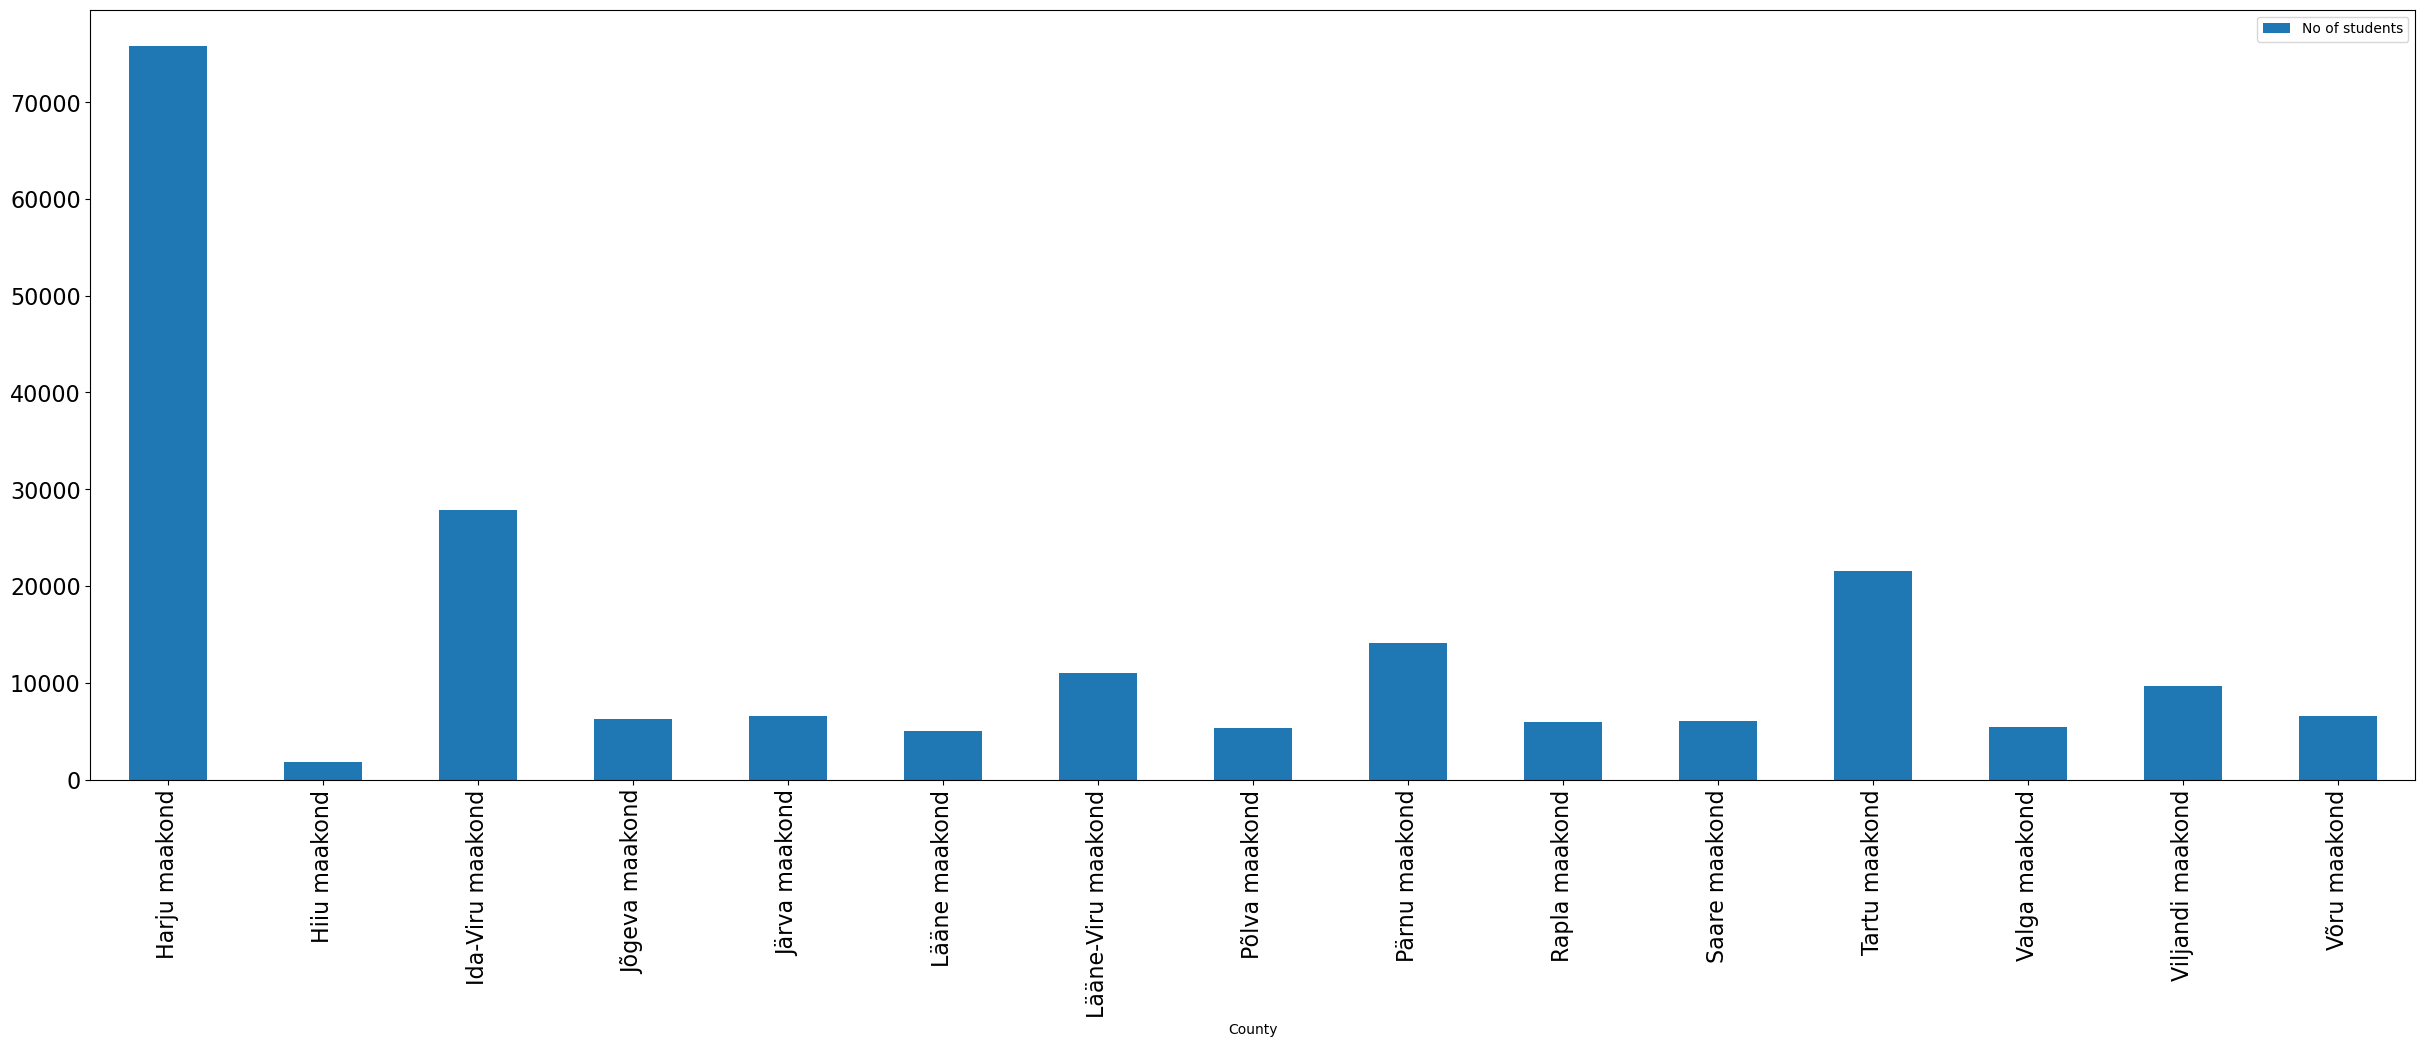

In [146]:
# Teeme filterdatud tabeli põhjal tulpdiagrammi (ingl. "bar chart")

# impordime graafiku jaoks vajalikud funktsioonid
import matplotlib.pyplot as plt 

my_chart = my_data_filtered.plot(kind = 'bar', x ='County', y ='No of students', figsize = (30, 10), fontsize = 16)

# järgmisel real sama, kuid tulbad sorteeritud (kommenteeri ülemine rida välja, et muutust näha):
# my_chart = my_data_filtered.sort_values(by= ['No of students'],ascending = False).plot(kind = 'bar', x ='County', y ='No of students', figsize = (30, 10), fontsize = 16)

# kuna me defineerisime ülal graafiku nimega my_chart, saame talle allpool omadusi juurde lisada
# eemalda ridahaaval allpool kommentaarid ja vajuta <Run> - nii näed paremini mis iga rea lisamisega graafikul muutub

# my_chart.bar_label(my_chart.containers[0], fontsize = 12) # lisame tulpade kohale märgendid (ingl. labels)
# plt.xticks(rotation = 30, horizontalalignment = "center") # maakonna nimede pööramine 30 kraadi
# plt.title("Õpilaste arv maakonniti 1993", fontsize = 20) # lisame graafikule pealkirja
# plt.xlabel("Maakond", fontsize = 16) # lisame pealkirja x-teljele
# plt.ylabel("Õpilaste arv", fontsize = 16) # lisame pealkirja y-teljele

Sorteeri andmed üle-eelmises plokis kahanevasse järjekorda ja loo graafik uuesti.
Kas muutus informatiivsemaks?

In [147]:
# Võrdleme esimest ja viimast aastat. Mida näeme?
list_of_years = [1993, 2021]

my_data_filtered = my_data.query("Year in @list_of_years")
# my_data_filtered = my_data.sort_values(by = ['County','Year']).query("Year in @list_of_years") # järjestame read vastavalt aastaarvule kasvavas järjekorras

my_data_filtered

# -------------------------------------------------------------------- # 

# lihtsalt testimiseks, kui on soovi: kuidas filteerida mitme veeru väärtuste alusel:

# list_of_counties = ['Harju maakond','Hiiu maakond']
# my_data_filtered = my_data.query("Year in @list_of_years and County in @list_of_counties") 

# my_data_filtered

,Year,County,No of schools,No of students
0,1993,Harju maakond,154,75774
1,1993,Hiiu maakond,14,1794
2,1993,Ida-Viru maakond,59,27811
3,1993,Jõgeva maakond,34,6290
4,1993,Järva maakond,35,6560
5,1993,Lääne maakond,27,5028
6,1993,Lääne-Viru maakond,51,10982
7,1993,Põlva maakond,35,5311
8,1993,Pärnu maakond,63,14079
9,1993,Rapla maakond,34,6002


Graafiku joonistamiseks teeme ülalolevatest filtreeritud andmetest liigenttabeli (ingl. "pivot table")

In [148]:
# loome järgmise graafiku jaoks liigendtabeli

my_pivot = pd.pivot_table(my_data_filtered, values='No of students', 
                                index='County', # DataFrame'i indeks on "nähtamatu" veerg "Index", aga me soovime tabeli ridadel näidata maakonna nime, mitte indeksi väärtust (0, 1, 2, ...)
                                columns='Year')

# Veerg sorteeritud õpilaste arvu kahanevas järjekorras
my_pivot = my_pivot.sort_values(by=[1993], ascending=False)

my_pivot

Year,1993,2021
County,,
Harju maakond,75774,74825
Ida-Viru maakond,27811,12755
Tartu maakond,21602,21260
Pärnu maakond,14079,10051
Lääne-Viru maakond,10982,6873
Viljandi maakond,9699,5108
Võru maakond,6604,3578
Järva maakond,6560,3203
Jõgeva maakond,6290,2826


Text(0, 0.5, 'Õpilaste arv')

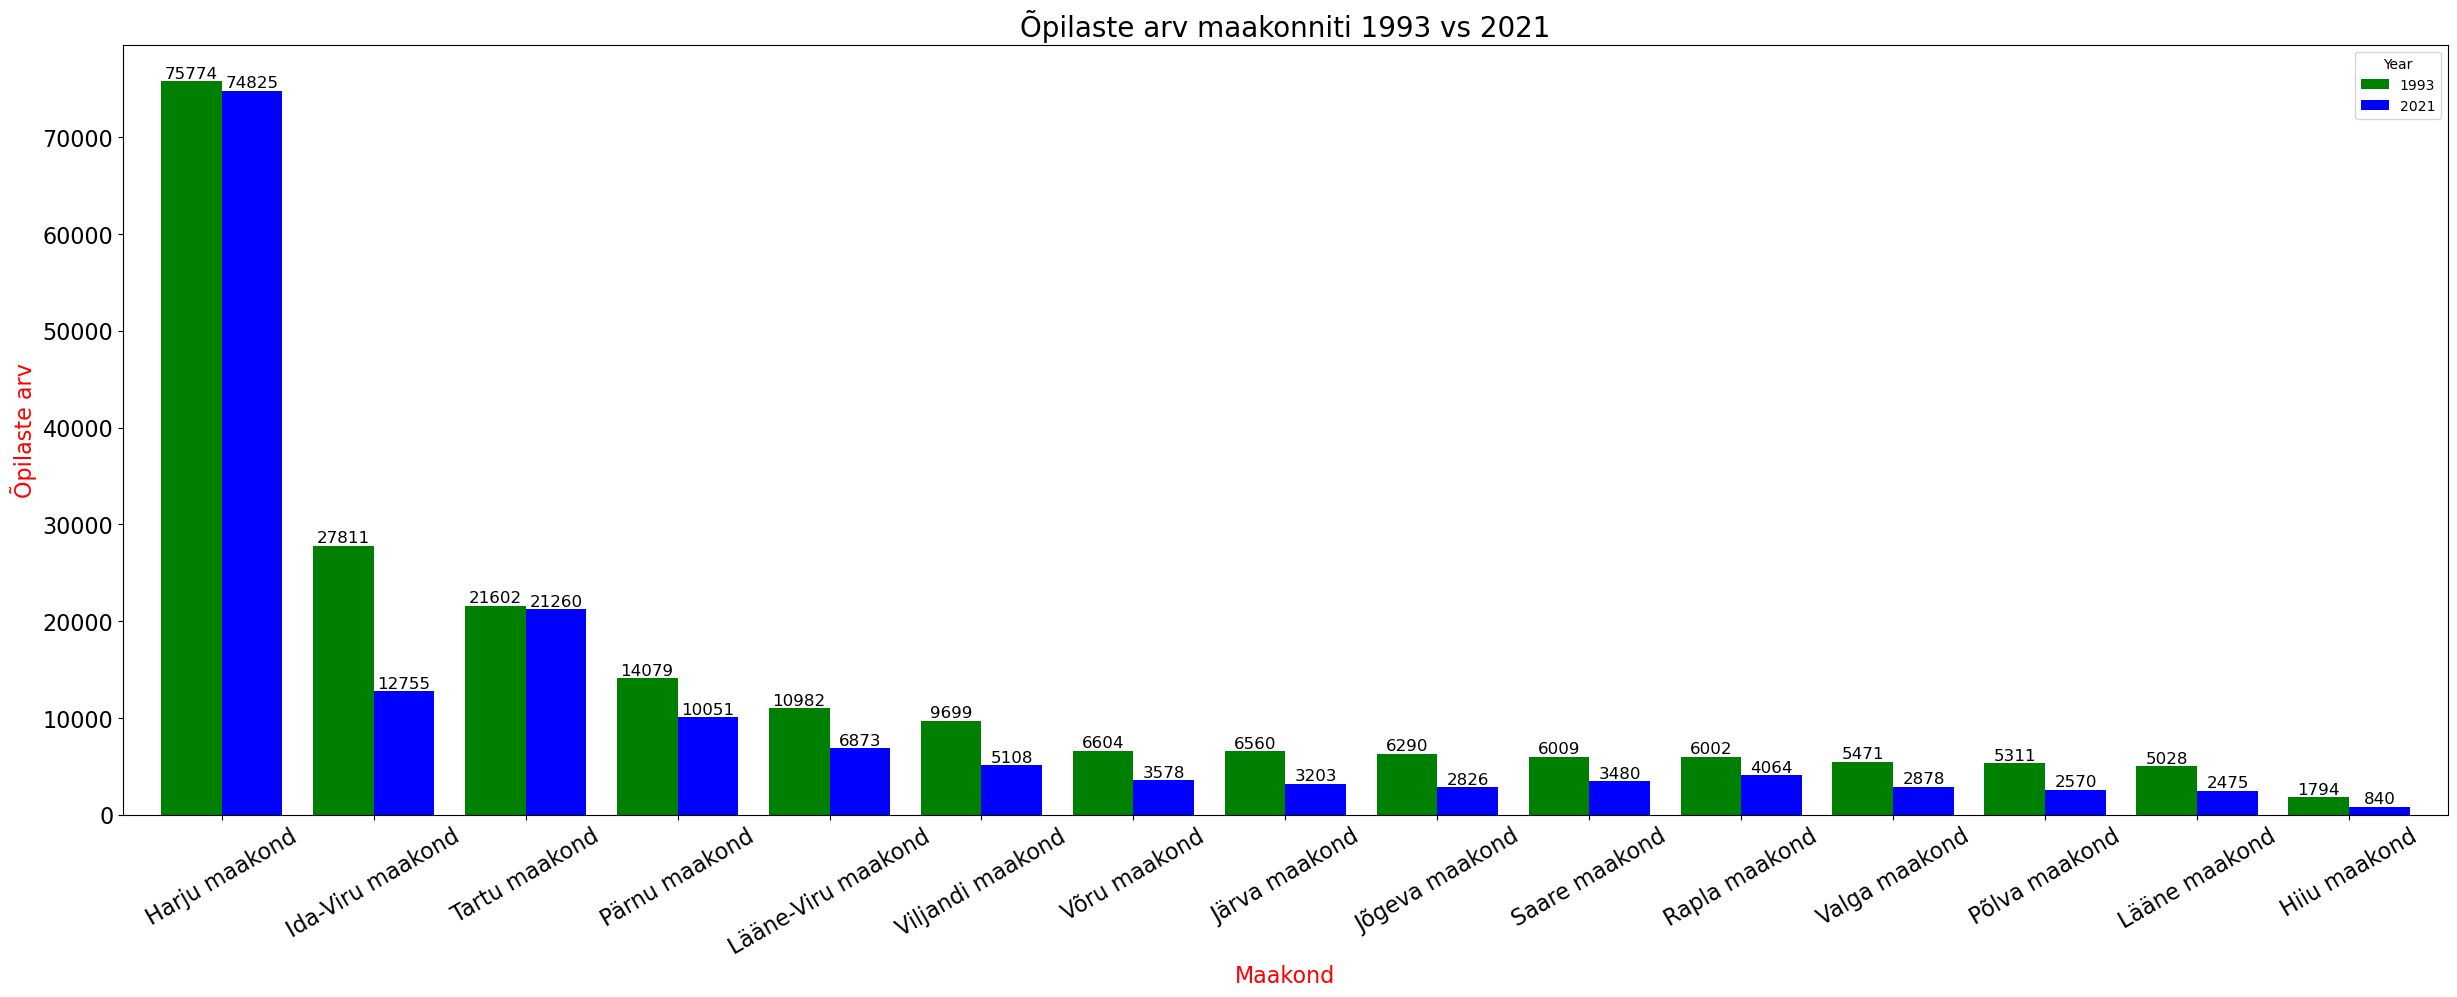

In [149]:
# Liigendtabeli alusel loome tulpdiagrammi.
# Millises maakonnas paistab õpilaste arvu muutus kohe välja? Kus ei ole olulist muutust 29 aastaga toimunud?

# impordime graafiku jaoks vajalikud funktsioonid - see jäi meil tunnis tegemata, mistõttu ükski plt.* funtsioon ei toiminud
import matplotlib.pyplot as plt 

# color=['black','red'] võib ka ära jätta, siis valitakse värvid vaikimisi
# värvivalikud: color=['black', 'red', 'green', 'blue', 'cyan'] või suurem valik värve 16-ndkoodis https://www.color-hex.com (värvi koodi ette tuleb siis lisada #)
my_chart = my_pivot.plot(kind = 'bar', color=['green','blue'], figsize = (30, 10), fontsize = 16, width=0.8) # iga aasta tulbast tekitatakse nö "konteiner" koos kõikide tema omadustega
my_chart.bar_label(my_chart.containers[0], fontsize = 12) # lisab märgendid (ingl. labels) esimese aasta tulpadele
my_chart.bar_label(my_chart.containers[1], fontsize = 12) # lisab märgendid teise aasta tulpadele
plt.xticks(rotation = 30, horizontalalignment = "center") # pöörab x-telje märgendid 30 kraadise nurga alla
plt.title("Õpilaste arv maakonniti 1993 vs 2021", fontsize = 20) # lisab graafikule pealkirja
plt.xlabel("Maakond", fontsize = 16, color = 'red') # lisab x-teljele pealkirja
plt.ylabel("Õpilaste arv", fontsize = 16, color = 'red') # lisab y-teljele pealkirja

In [150]:
###########################################################################
# KODUNE TÖÖ:
# loo sarnane graafik koolide arvu kohta 1993 vs 2021
# alusta uue liigendtabeli defineerimisest, nimeks pane "my_pivot_schools"
###########################################################################

Liigendtabeli väärtustega saab teha tehteid (summerida, arvutada keskmist)

In [152]:
my_pivot = pd.pivot_table(my_data,
                          aggfunc= {'No of students': 'mean', 'No of schools': 'mean'}, # arvutame mõlemast veerust iga aasta kohta (columns='Year') keskmise väärtuse, üle maakondade
                          columns='Year')

# Veerg sorteeritud kahanevas järjekorras
# my_pivot = my_pivot.sort_values(by=[1993], ascending=False)

my_pivot

# või siis teistpidi, read-veerud vahetatud:
# my_pivot = pd.pivot_table(my_data, aggfunc= {'No of students': 'mean', 'No of schools': 'mean'}, index = 'Year')
# my_pivot

Year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
No of schools,48.266667,49.400000,49.466667,49.266667,48.666667,48.133333,47.066667,45.666667,43.6,42.4,...,35.466667,36.000000,35.200000,34.533333,34.600000,34.466667,34.6,34.533333,34.133333,34.066667
No of students,13934.400000,14158.333333,14304.133333,14377.400000,14500.066667,14505.133333,14389.400000,14145.600000,13840.8,13365.2,...,8998.333333,9026.133333,9149.066667,9365.533333,9580.866667,9856.600000,10077.6,10210.333333,10340.266667,10452.400000


In [ ]:
##################################################
# 17.03.2023 ehk reedese tunni materjal algab siit
##################################################

Kuidas luua graafik, kus näeme maakondade lõikes trendi üle kõigi aastate ?

In [153]:
# Tuletame meelde, millised on meie lähteandmed:
my_data

,Year,County,No of schools,No of students
0,1993,Harju maakond,154,75774
1,1993,Hiiu maakond,14,1794
2,1993,Ida-Viru maakond,59,27811
3,1993,Jõgeva maakond,34,6290
4,1993,Järva maakond,35,6560
...,...,...,...,...
430,2021,Saare maakond,21,3480
431,2021,Tartu maakond,59,21260
432,2021,Valga maakond,18,2878
433,2021,Viljandi maakond,28,5108


In [154]:
# Teeme uue liigendtabeli
my_pivot_all = pd.pivot_table(my_data, values='No of students', 
                                index='County', 
                                columns='Year')

my_pivot_all

Year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,,,,,,,,,,
Harju maakond,75774,76502,76991,77189,78068,78056,77398,76034,74263,71488,...,55056,56854,59073,61874,64456,67441,69982,71872,73395,74825
Hiiu maakond,1794,1858,1956,1934,1946,1946,1929,1903,1898,1840,...,918,861,818,822,815,821,827,832,820,840
Ida-Viru maakond,27811,28466,28601,28310,28156,27662,26840,25663,24554,23137,...,14138,14052,14129,14141,14090,13683,13578,13218,13050,12755
Järva maakond,6560,6537,6664,6733,6771,6723,6718,6536,6397,6075,...,3296,3176,3108,3148,3083,3180,3221,3236,3175,3203
Jõgeva maakond,6290,6352,6350,6344,6408,6465,6403,6353,6315,6162,...,3394,3288,3195,3164,3090,3009,2955,2872,2856,2826
Lääne maakond,5028,5074,5051,5101,5120,5146,5166,5135,4996,4844,...,2815,2728,2723,2712,2725,2450,2461,2446,2458,2475
Lääne-Viru maakond,10982,11082,11261,11320,11507,11645,11541,11461,11350,11044,...,6843,6719,6629,6589,6601,6786,6762,6741,6873,6873
Pärnu maakond,14079,14587,14837,15039,15294,15408,15438,15264,15018,14528,...,9111,8905,8835,8940,9087,9600,9732,9761,9844,10051
Põlva maakond,5311,5501,5522,5535,5557,5536,5472,5416,5312,5130,...,2804,2700,2620,2573,2573,2471,2458,2496,2553,2570


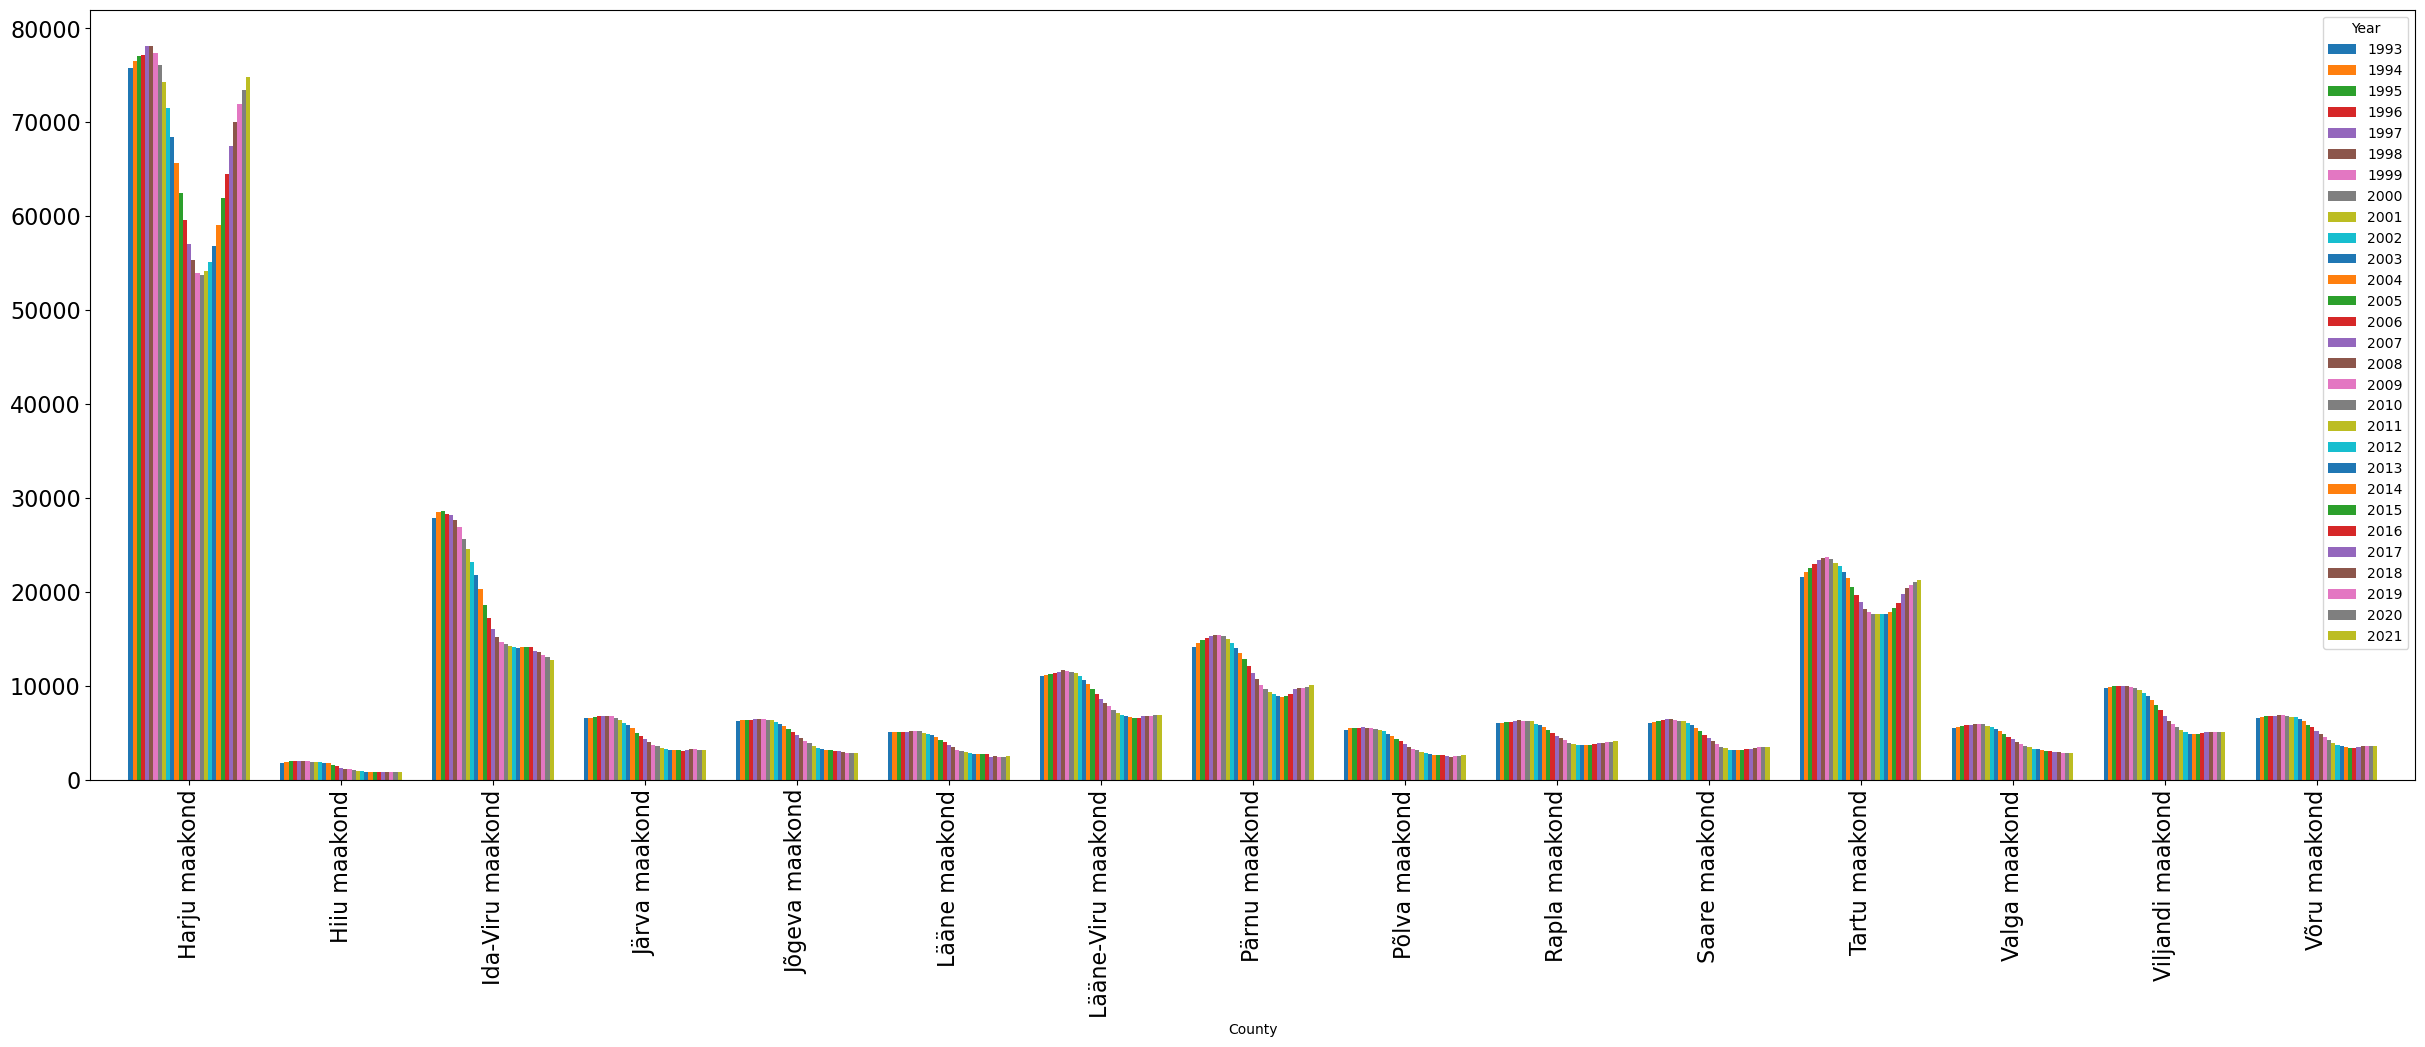

In [155]:
# Graafik ülalolev aliigendtabeli põhjal :
my_chart = my_pivot_all.plot.bar(figsize = (30, 10), fontsize = 16, width=0.8)

In [156]:
# Muudame liigendtabelit: vahetame read ja veerud ära
my_pivot_all = pd.pivot_table(my_data, values='No of students', 
                                index='Year', 
                                columns='County')

# Aasta veerg sorteeritud kahanevas järjekorras
my_pivot_all = my_pivot_all.sort_values(by=['Year'], ascending=True)

my_pivot_all

County,Harju maakond,Hiiu maakond,Ida-Viru maakond,Järva maakond,Jõgeva maakond,Lääne maakond,Lääne-Viru maakond,Pärnu maakond,Põlva maakond,Rapla maakond,Saare maakond,Tartu maakond,Valga maakond,Viljandi maakond,Võru maakond
Year,,,,,,,,,,,,,,,
1993,75774,1794,27811,6560,6290,5028,10982,14079,5311,6002,6009,21602,5471,9699,6604
1994,76502,1858,28466,6537,6352,5074,11082,14587,5501,6030,6135,22049,5633,9863,6706
1995,76991,1956,28601,6664,6350,5051,11261,14837,5522,6087,6211,22578,5678,10007,6768
1996,77189,1934,28310,6733,6344,5101,11320,15039,5535,6157,6346,22981,5864,9991,6817
1997,78068,1946,28156,6771,6408,5120,11507,15294,5557,6249,6407,23367,5818,10014,6819
1998,78056,1946,27662,6723,6465,5146,11645,15408,5536,6317,6410,23557,5880,9974,6852
1999,77398,1929,26840,6718,6403,5166,11541,15438,5472,6291,6355,23696,5883,9876,6835
2000,76034,1903,25663,6536,6353,5135,11461,15264,5416,6247,6286,23484,5919,9762,6721
2001,74263,1898,24554,6397,6315,4996,11350,15018,5312,6187,6243,23087,5732,9569,6691


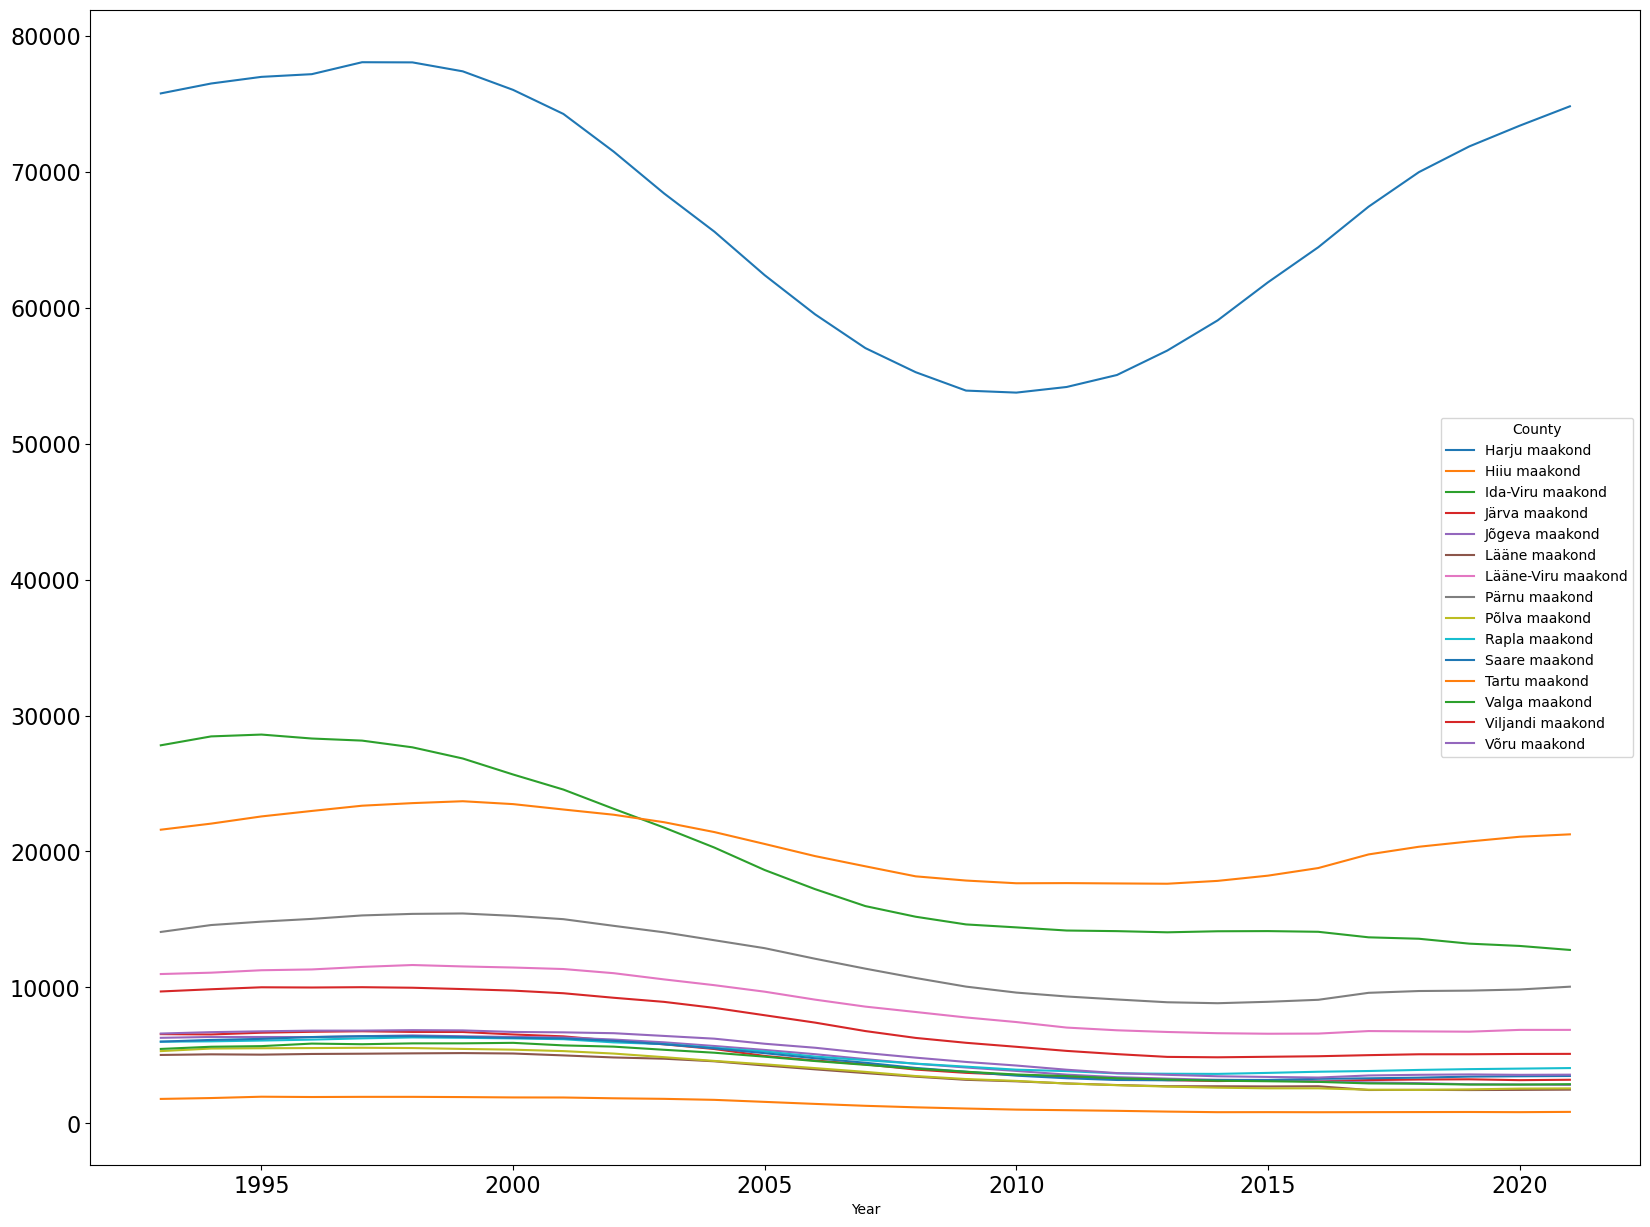

In [157]:
# Graafik muudetud liigendtabeli põhjal:

import matplotlib.pyplot as plt

my_chart = my_pivot_all.plot(figsize = (20, 15), fontsize = 16) # kasutame teist graafiku tüüpi: joondiagramm (kind = 'bar' lisamisel saaksime taas tulpdiagrammi)

Väiksemate maakondade graafikud on tihedalt koos, raske eristada.
Kasutame y-teljel logaritmilist skaalat (log10).

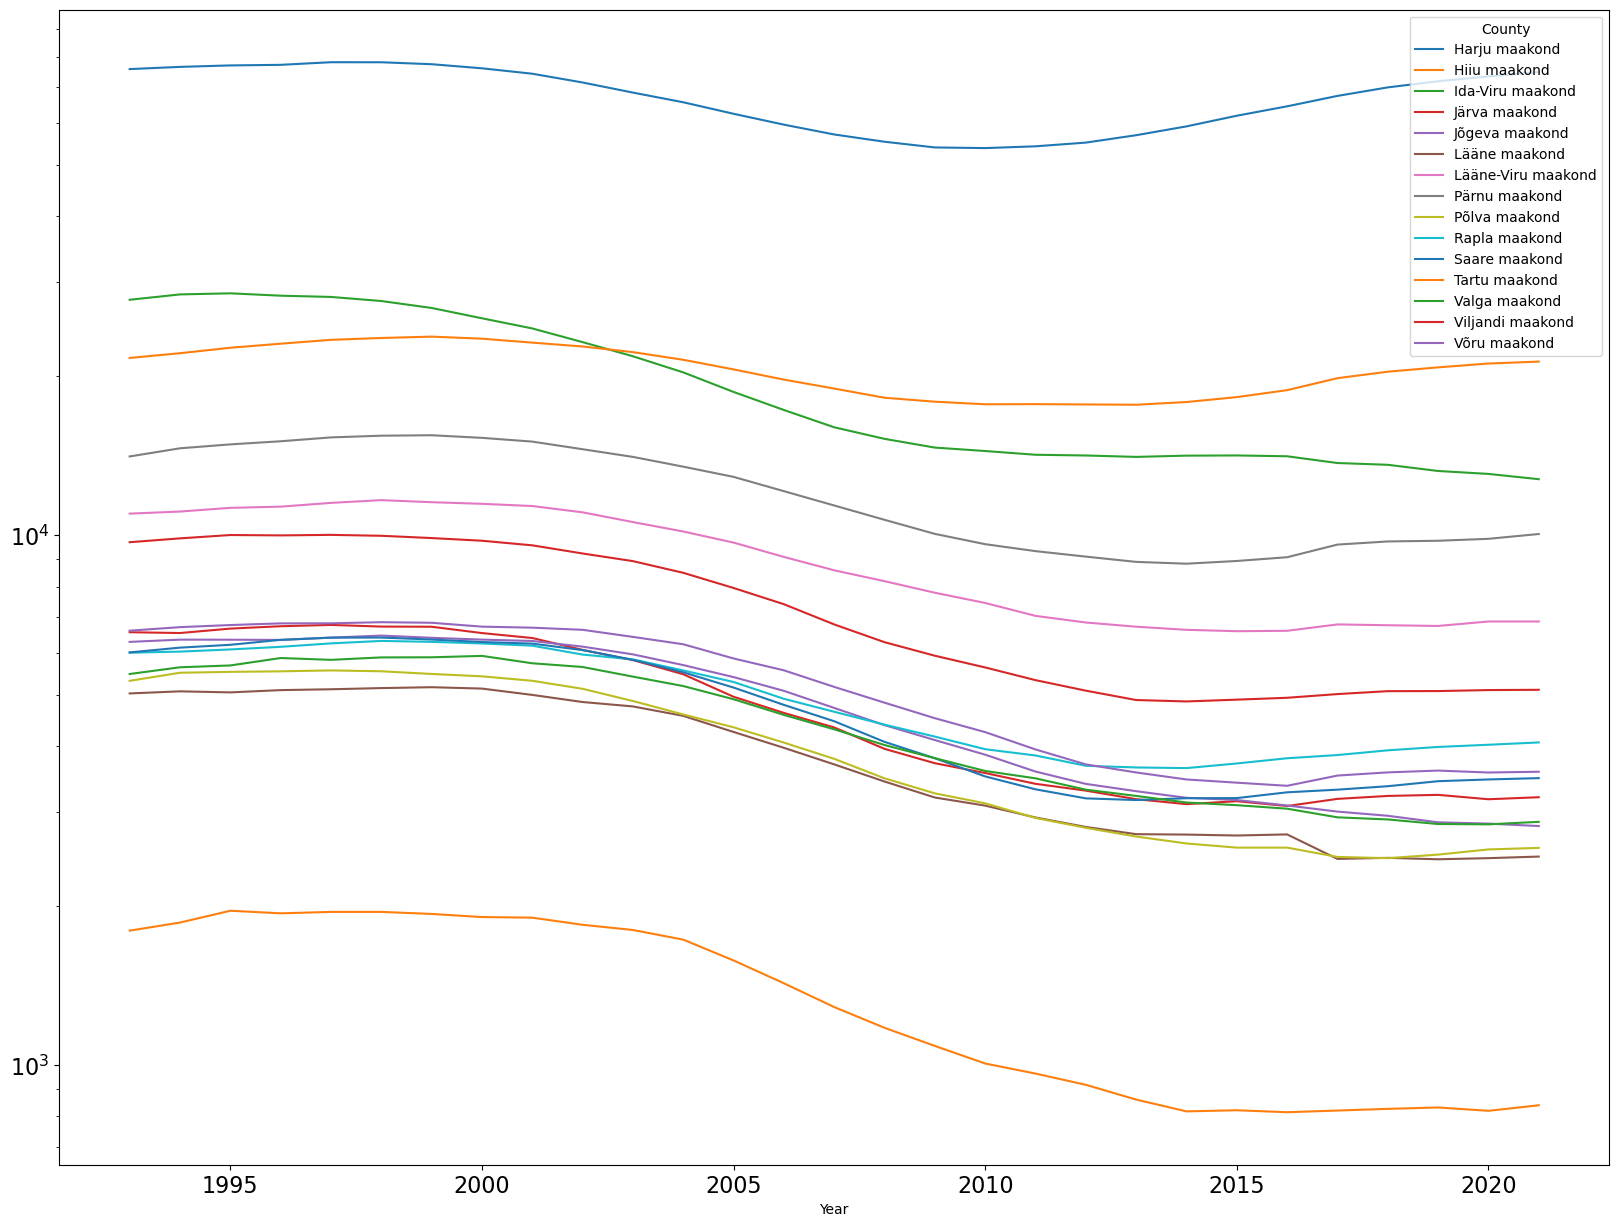

In [158]:
import matplotlib.pyplot as plot

my_chart = my_pivot_all.plot(figsize = (20, 15), fontsize = 16)
my_chart.set_yscale('log')

Kodune töö uuede kaggle notebook'i: sarnane harjutus koolide arvu kohta (veerg: "No of schools")
    - andmete võrdlused, tabelid
    - graafikud

Millist uut infot saame, kui arvutada tudengite arvu kooli kohta?

In [159]:
# Uue veeru lisamine: tudengite arv ühe kooli kohta maakonnas
my_data["No of students per school"] = round(my_data["No of students"] / my_data["No of schools"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [160]:
# python annab hoiatuse, tasub kontrollida kas uus veerg lisati õigesti:
my_data

,Year,County,No of schools,No of students,No of students per school
0,1993,Harju maakond,154,75774,492.0
1,1993,Hiiu maakond,14,1794,128.0
2,1993,Ida-Viru maakond,59,27811,471.0
3,1993,Jõgeva maakond,34,6290,185.0
4,1993,Järva maakond,35,6560,187.0
...,...,...,...,...,...
430,2021,Saare maakond,21,3480,166.0
431,2021,Tartu maakond,59,21260,360.0
432,2021,Valga maakond,18,2878,160.0
433,2021,Viljandi maakond,28,5108,182.0


Vaatame 3 näitajat koos:

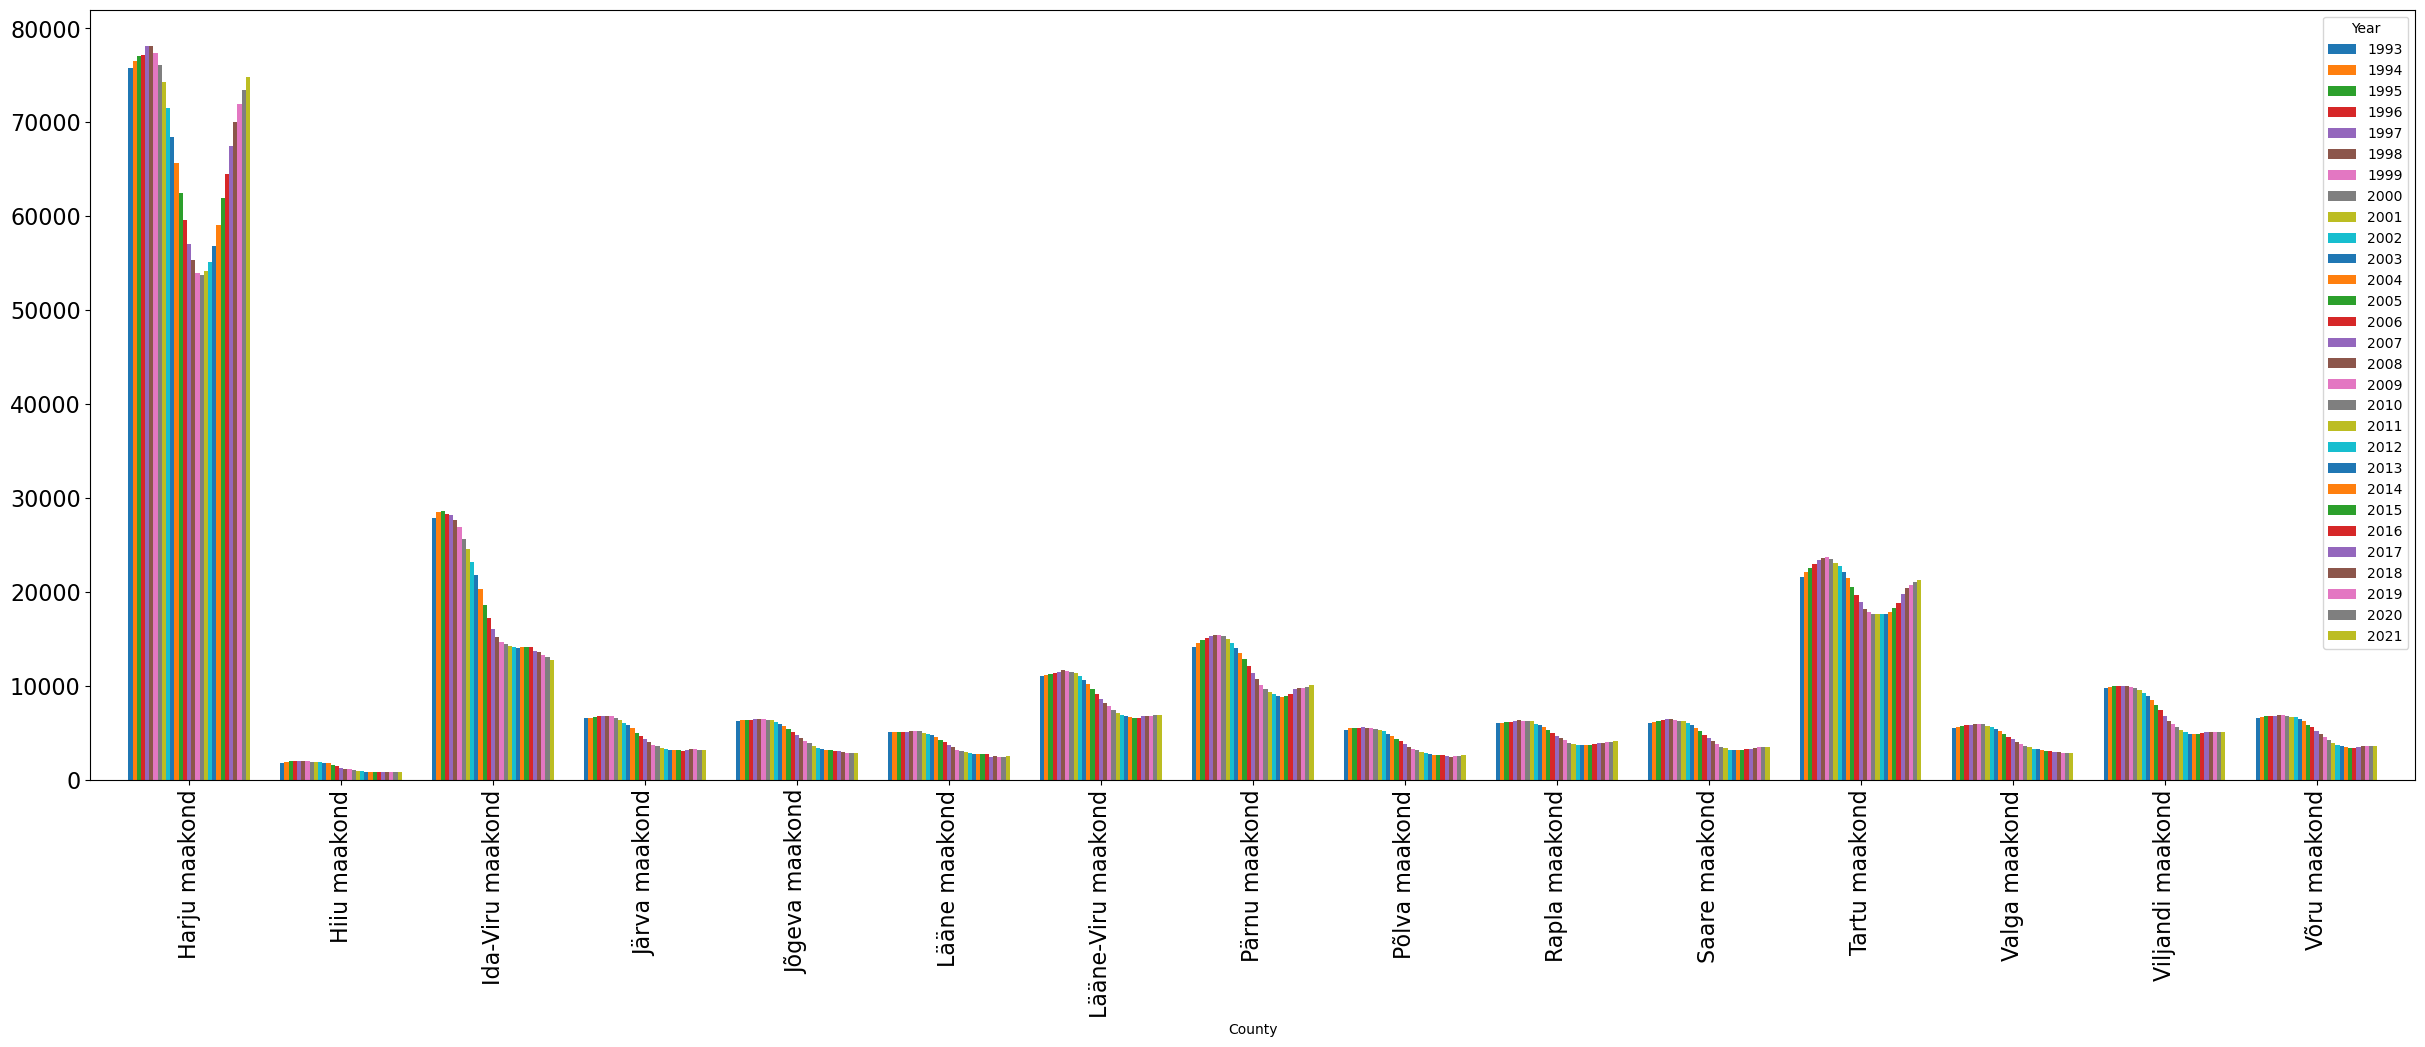

In [161]:
# kui soovid uurida konkreetset maakonda lähemalt, saad filterdada nii:
# my_data_filtered = my_data.query("County == 'Hiiu maakond'")
# siis kasuta liigendtabeli loomisel my_data asemel my_data_filtered

# Õpilaste arv

my_pivot_s = pd.pivot_table(my_data, values='No of students', index='County', columns='Year')

#my_pivot_all = pd.pivot_table(my_data_filtered, values='No of students', index='County', columns='Year')

my_chart_s = my_pivot_s.plot.bar(figsize = (30, 10), fontsize = 16, width=0.8)


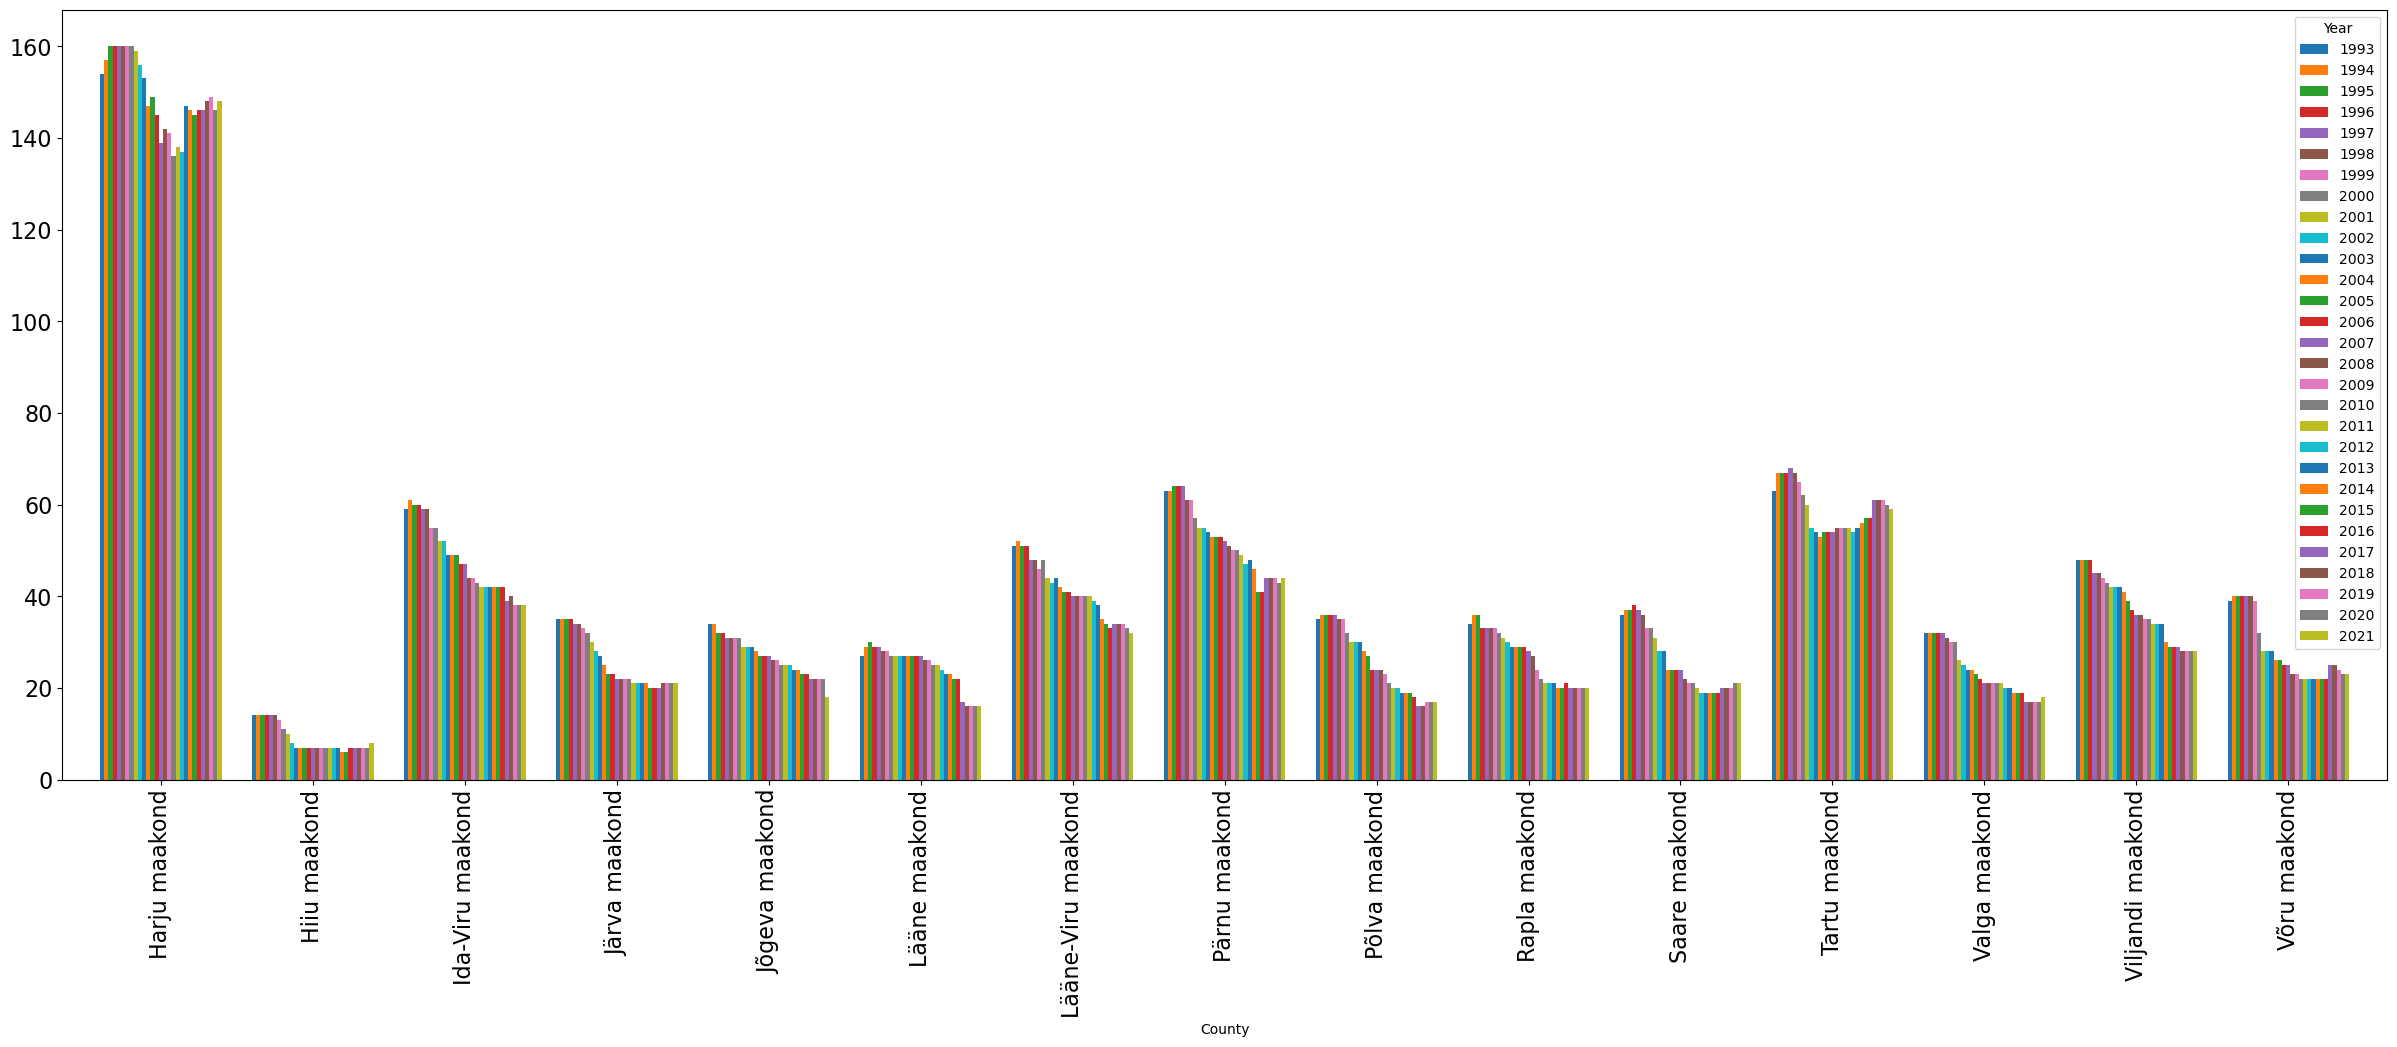

In [162]:
# Koolide arv

my_pivot_sc = pd.pivot_table(my_data, values='No of schools',index='County',columns='Year')

#my_pivot_all = pd.pivot_table(my_data_filtered, values='No of schools', index='County', columns='Year')

my_chart_sc = my_pivot_sc.plot.bar(figsize = (30, 10), fontsize = 16, width=0.8)

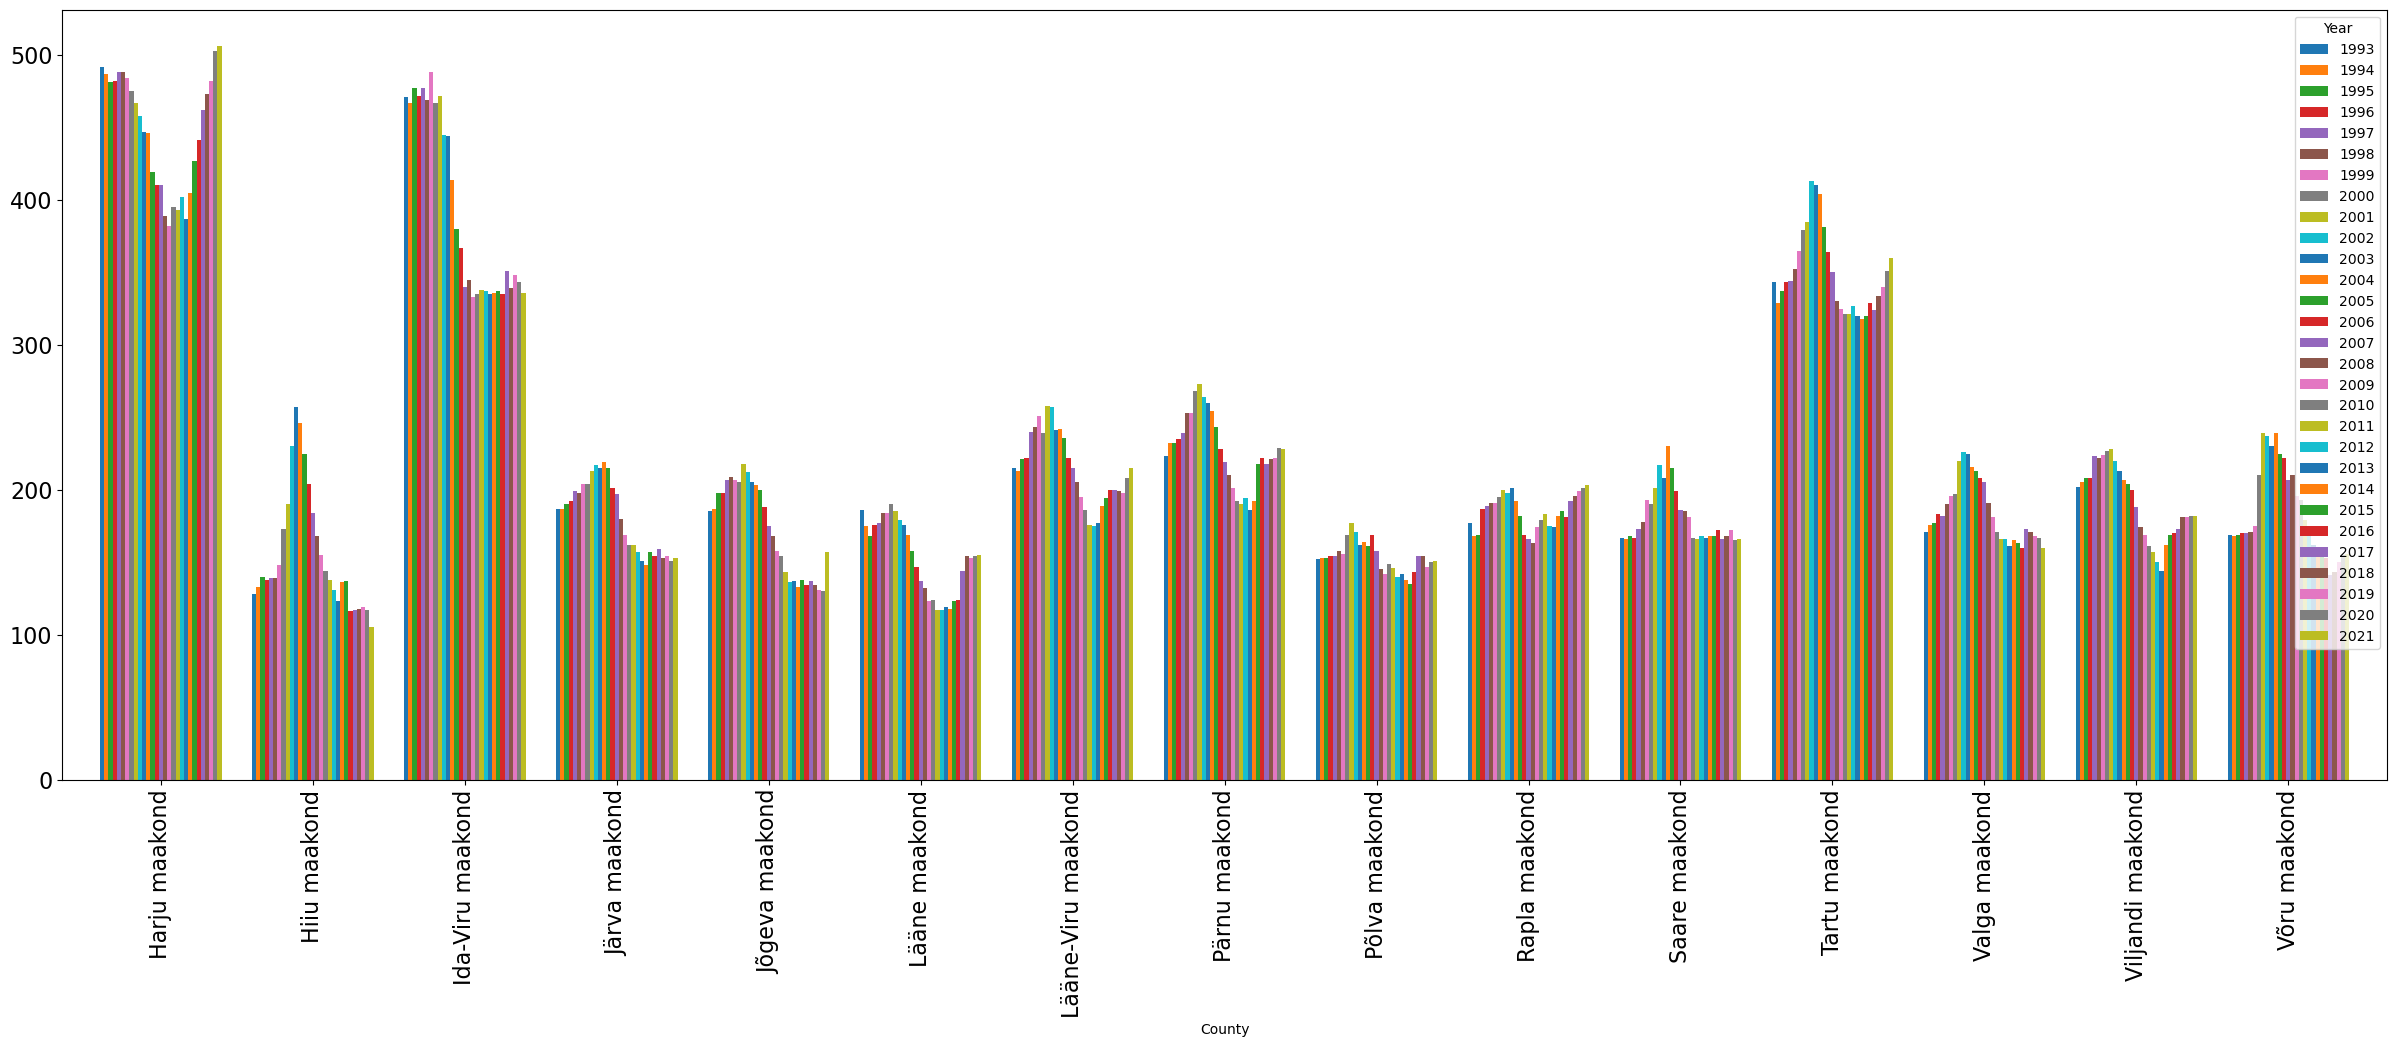

In [163]:
# Õpilaste arv kooli kohta

my_pivot_st = pd.pivot_table(my_data, values='No of students per school', index='County', columns='Year')

# my_pivot_all = pd.pivot_table(my_data_filtered, values='No of students per school', index='County', columns='Year')

my_chart_st = my_pivot_st.plot.bar(figsize = (30, 10), fontsize = 16, width=0.8)


Mis toimub Hiimuaal? Filtreerime lähteandmeid, jättes sisse aunult Hiiu maakonna.
Kas Hiiumaal kiirustati koolide sulgemisega, teades sündide arvu?

Saab luua alamgraafikud mugavamaks visaalseks võrdlemiseks

In [164]:
my_pivot_students = pd.pivot_table(my_data, values='No of students', index='County', columns='Year')
my_pivot_schools = pd.pivot_table(my_data, values='No of schools',index='County',columns='Year')
my_pivot_calc = pd.pivot_table(my_data, values='No of students per school', index='County', columns='Year')

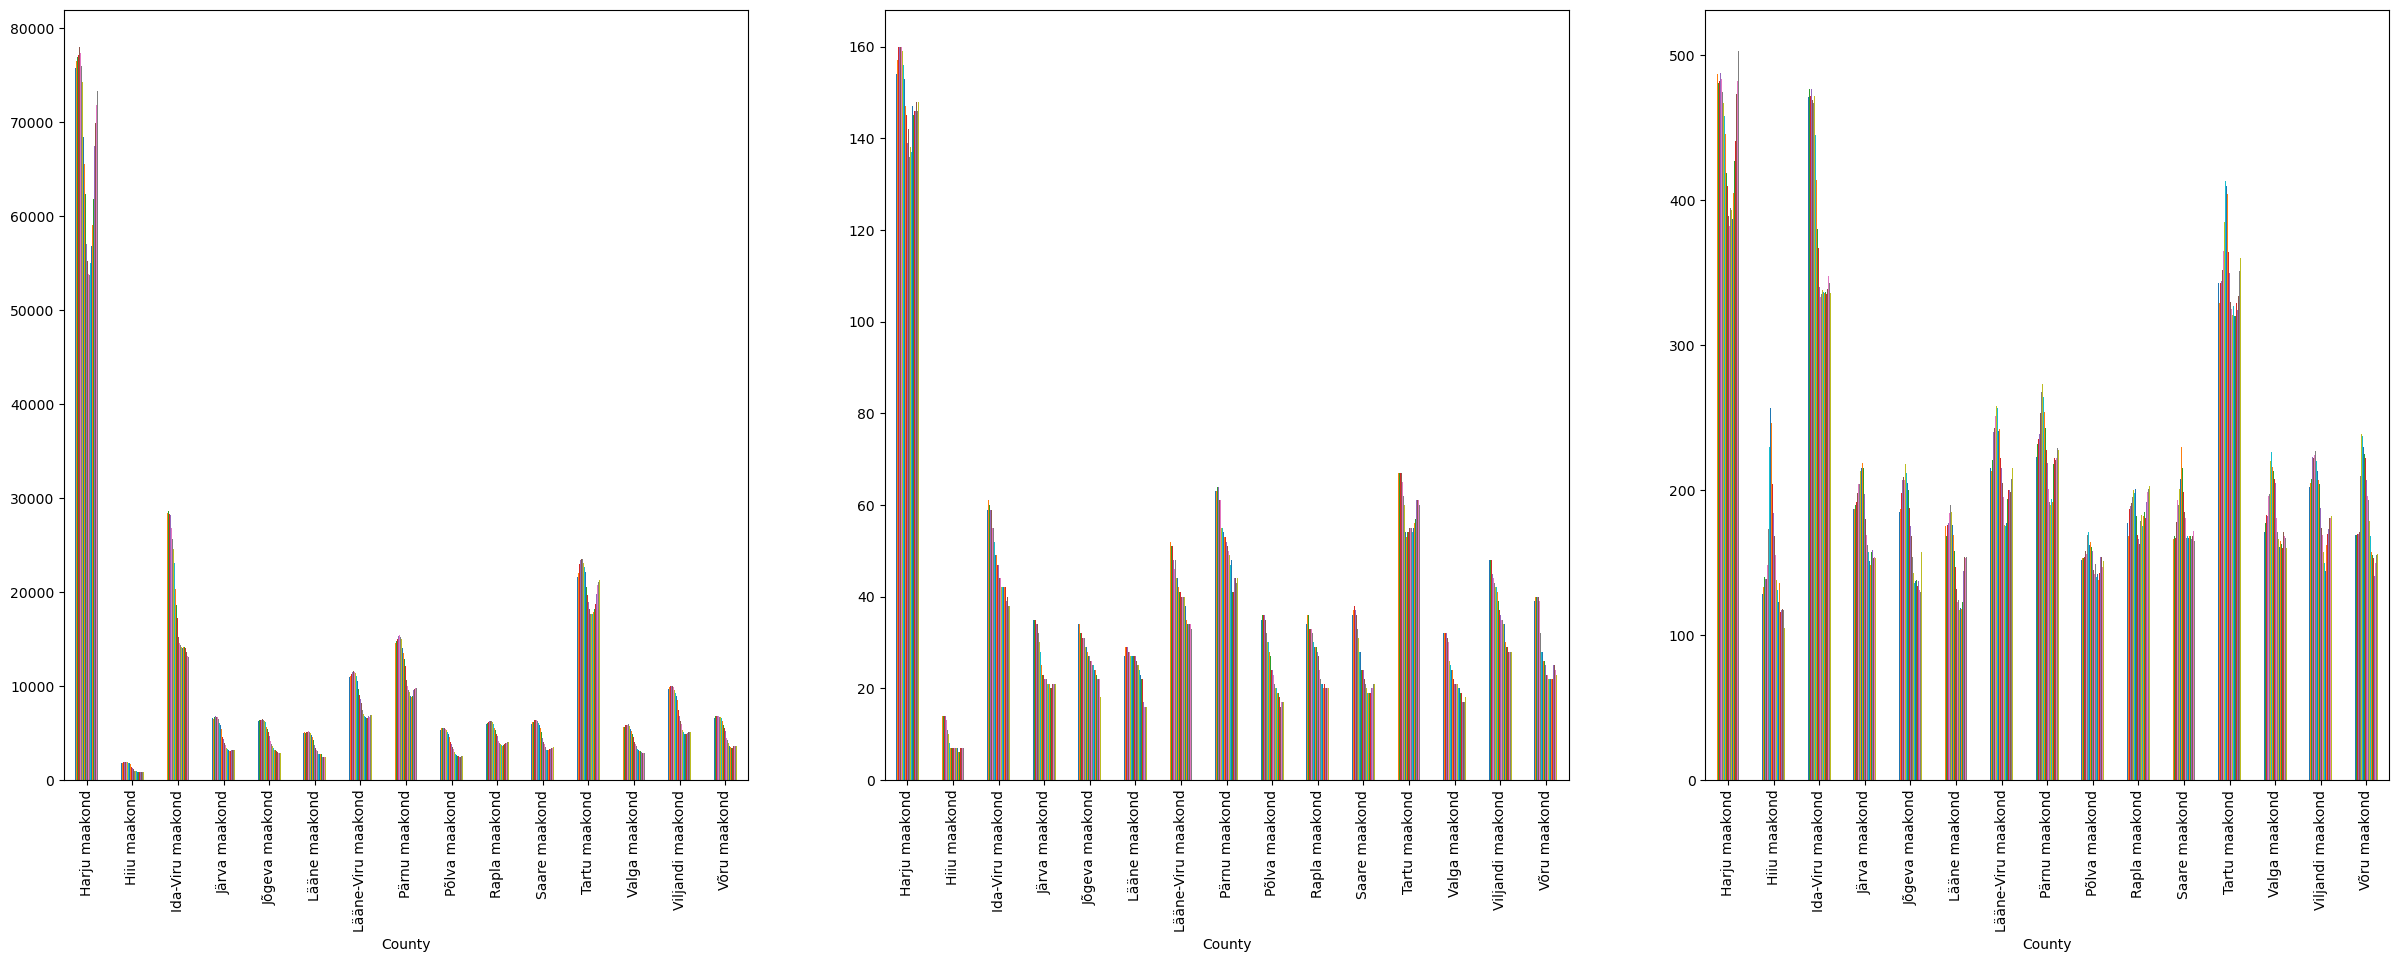

In [171]:
# subplots-funktsiooniga loome 2 muutujat: peagraafiku (my_chart) ning alamgraafikud (ax)
my_chart, ax = plt.subplots(1, 3, figsize=(30,10)) # 3 alamgraafikut 1-s reas (üksteise kõrval)
# my_chart, ax = plt.subplots(3, 1, figsize=(30,10)) # 3 alamgraafikut 3-s reas (üksteise all)

# defineerime alamgraafikud ning nende esitamise järjekorra
my_pivot_students.plot(kind='bar', ax=ax[0])
my_pivot_schools.plot(kind='bar', ax=ax[1])
my_pivot_calc.plot(kind='bar', ax=ax[2])

# eemaldame aastaarvude legendi kõigilt 3-lst alamgraafikult
ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()

my_chart.show()

In [166]:
###############################################################
# huvi korral saad iseseisvalt edasi uurida näiteks siin:
#
# https://www.kaggle.com/learn
# https://www.w3schools.com/python/pandas/pandas_dataframes.asp
#
###############################################################

In [169]:
###########################################################
# pythoni osa lõpetuseks:
# mitme korraga arvad ära allolevas mängus küsitud numbri ?
###########################################################

import random # library import

juhuslik_number = random.randint(1, 10) # juhusliku täisarvu genereerimine soovitud vahemikus

while True: # lõpmatu kordus kuni väljumis-tingimus on tõene (pakutud_number võrdub juhuslik_number)
    pakutud_number = int(input("Arva ära number vahemikus 1 kuni 10: ")) # input-funktsioon küsib kasutaja sisendit (teksti-tüüpi);
    # int-funktsioon teisendab sisestatud teksti täisarvuks, et see oleks sama genereeritud juhuslik_number'iga sama tüüpi (muidu ei saa neid omavahel võrrelda)
    if pakutud_number == juhuslik_number:
        print("Palju õnne, õige vastus!")
        break # kordusest väljumine, mängu lõpp
    elif pakutud_number < juhuslik_number:
        print("Liiga väike! Proovi uuesti.")
    else:
        print("Liiga suur! Proovi uuesti.")

Arva ära number vahemikus 1 kuni 10:  5


Liiga suur! Proovi uuesti.


Arva ära number vahemikus 1 kuni 10:  1


Liiga väike! Proovi uuesti.


Arva ära number vahemikus 1 kuni 10:  3


Liiga suur! Proovi uuesti.


Arva ära number vahemikus 1 kuni 10:  2


Palju õnne, oled numbri ära arvanud!
